In [3]:
import numpy as np
import pandas as pd

### 0. 주어진 데이터를 불어온 후 상위 10개 행을 출력해 주세요.

In [4]:
df = pd.read_csv('../train.csv')

In [5]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
5,5,20150403T000000,662500.0,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
6,6,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
7,7,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
8,8,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
9,9,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,...,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850


### 1. 각 Column별로 null값이 있는지 확인해주세요.

In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### 2. grade Column에는 어떤 값이 있는지 확인해주세요.

In [7]:
df['grade'].unique()

array([ 7,  6,  8,  9, 10, 11, 12,  5,  4,  3, 13,  1], dtype=int64)

### 3. zipcode에 대해서 문자열로 바꿔주세요.

In [8]:
df['zipcode'] = df['zipcode'].astype(object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  object 
 17  lat            15035 non-null  float64
 18  long  

### 4. loc를 활용하여 date, price, grade만 출력해주세요.

In [10]:
df.loc[:,['date','price','grade']]

,date,price,grade
0,20141013T000000,221900.0,7
1,20150225T000000,180000.0,6
2,20150218T000000,510000.0,8
3,20140627T000000,257500.0,7
4,20150115T000000,291850.0,7
...,...,...,...
15030,20141014T000000,610685.0,9
15031,20150326T000000,1007500.0,9
15032,20140521T000000,360000.0,8
15033,20150223T000000,400000.0,8


### 5. grade가 13인 행들만 보여주세요.

In [11]:
df[df['grade']==13]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3134,3134,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
3867,3867,20141010T000000,1780000.0,4,3.25,4890,13402,2.0,0,0,...,13,4890,0,2004,0,98059,47.5303,-122.131,5790,13539
4266,4266,20141120T000000,2385000.0,4,4.00,6330,13296,2.0,0,2,...,13,4900,1430,2000,0,98033,47.6488,-122.201,2200,9196
4957,4957,20140701T000000,3800000.0,5,5.50,7050,42840,1.0,0,2,...,13,4320,2730,1978,0,98004,47.6229,-122.220,5070,20570
5108,5108,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
5560,5560,20140923T000000,3200000.0,6,5.00,7100,18200,2.5,0,0,...,13,5240,1860,1933,2002,98199,47.6427,-122.408,3130,6477
6469,6469,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
7246,7246,20141212T000000,2983000.0,5,5.50,7400,18898,2.0,0,3,...,13,6290,1110,2001,0,98006,47.5431,-122.112,6110,26442
10152,10152,20140611T000000,2888000.0,5,6.25,8670,64033,2.0,0,4,...,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021


### 6. grade별로 평균 가격을 보여주세요.

In [12]:
df.groupby('grade')['price'].agg([('grade_mean','mean')])

,grade_mean
grade,
1,1.420000e+05
3,2.710000e+05
4,2.097413e+05
5,2.510696e+05
6,3.001554e+05
7,4.015281e+05
8,5.423156e+05
9,7.734781e+05
10,1.062482e+06


### 7. 6번에서 만든 데이터를 원본 데이터와 merge해주세요.

In [13]:
grade_mean = df.groupby('grade')['price'].agg([('grade_mean','mean')])
pd.merge(df, grade_mean, on='grade',how='outer')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_mean
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,4.015281e+05
1,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,4.015281e+05
2,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,4.015281e+05
3,6,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,860,300,1942,0,98115,47.6900,-122.292,1330,6000,4.015281e+05
4,7,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,4.015281e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,5560,20140923T000000,3200000.0,6,5.00,7100,18200,2.5,0,0,...,5240,1860,1933,2002,98199,47.6427,-122.408,3130,6477,4.132333e+06
15031,6469,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,4.132333e+06
15032,7246,20141212T000000,2983000.0,5,5.50,7400,18898,2.0,0,3,...,6290,1110,2001,0,98006,47.5431,-122.112,6110,26442,4.132333e+06
15033,10152,20140611T000000,2888000.0,5,6.25,8670,64033,2.0,0,4,...,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021,4.132333e+06


### 8. Date Column을 이용해 년, 월, 일에 해당하는 3개의 새로운 Column을 만들어주세요.

In [14]:
df['year'] = df['date'].apply(lambda x: x[0:4])
df['month'] = df['date'].apply(lambda x: x[4:6])
df['day'] = df['date'].apply(lambda x: x[0:4])

In [15]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,2014
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,02,2015
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,02,2015
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,1995,0,98003,47.3097,-122.327,2238,6819,2014,06,2014
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,1963,0,98198,47.4095,-122.315,1650,9711,2015,01,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,15030,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,2014,0,98056,47.5137,-122.167,2520,6023,2014,10,2014
15031,15031,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,2009,0,98136,47.5537,-122.398,2050,6200,2015,03,2015
15032,15032,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,2014,05,2014
15033,15033,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,2015,02,2015


### 9. 이후 Price를 예측하는 모델을 제작하기 위해 추가적인 변수를 만드려고 합니다. Price의 데이터 분포를 확인하고 1개 이상의 EDA를 통해 의견을 제시해주세요.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

C:\Users\lms75\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


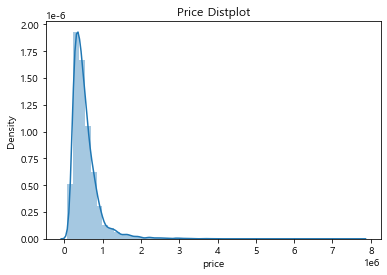

In [17]:
plt.title('Price Distplot')
sns.distplot(df['price'])
plt.show()

C:\Users\lms75\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


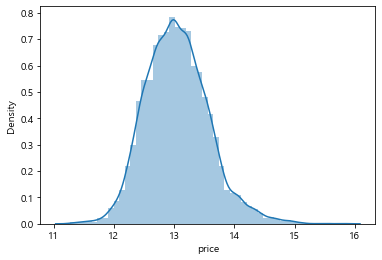

In [18]:
log_price = np.log1p(df['price'])
sns.distplot(log_price)
plt.show()

- target값인 price의 분포가 왜도를 띄고있기에 정규분포 형태로 변환

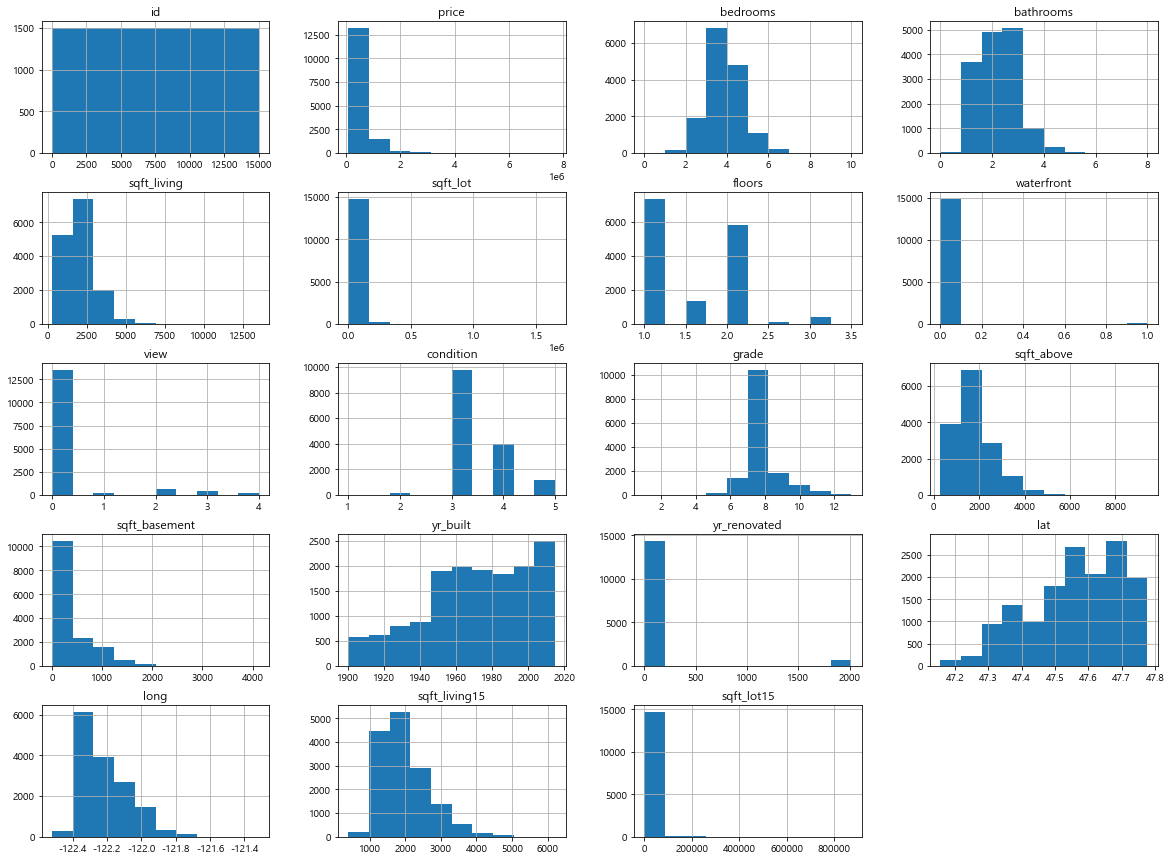

In [19]:
df.hist(figsize=(20,15))
plt.show()

In [20]:
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
14574,14574,20140610T000000,303210.0,4,2.50,2009,5000,2.0,0,0,...,2014,0,98092,47.2577,-122.198,2009,5182,2014,06,2014
8745,8745,20150429T000000,595000.0,3,1.00,1300,11520,1.0,0,0,...,1958,0,98033,47.6829,-122.195,1440,8064,2015,04,2015
9600,9600,20150414T000000,1810000.0,3,2.25,2910,15626,1.5,0,0,...,1923,0,98199,47.6534,-122.412,2370,6519,2015,04,2015
7912,7912,20150407T000000,1164000.0,3,3.50,3620,8072,2.0,0,0,...,1999,0,98006,47.5646,-122.127,3680,9624,2015,04,2015
11723,11723,20150401T000000,546200.0,4,2.25,2090,8579,2.0,0,0,...,1987,0,98074,47.6364,-122.030,1850,8843,2015,04,2015
10760,10760,20140925T000000,175000.0,2,1.00,740,3434,1.0,0,0,...,1920,0,98022,47.2088,-121.992,1160,6000,2014,09,2014
6938,6938,20141215T000000,429950.0,4,2.25,1740,10875,1.0,0,0,...,1967,0,98059,47.5132,-122.157,1680,10701,2014,12,2014
1908,1908,20150224T000000,470000.0,6,1.75,2490,8732,1.5,0,0,...,1966,0,98034,47.7252,-122.187,1840,8024,2015,02,2015
10771,10771,20141107T000000,660000.0,4,2.50,2290,9120,2.0,0,0,...,1977,0,98006,47.5613,-122.128,2290,9120,2014,11,2014
7696,7696,20140813T000000,408000.0,3,3.00,1500,1473,2.0,0,0,...,2000,0,98122,47.6063,-122.305,1720,1976,2014,08,2014


In [21]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000
mean,7517.000000,5.406827e+05,3.369139,2.115065,2083.790223,1.529697e+04,1.498071,0.007117,0.234253,3.406651,7.660725,1794.158164,289.632059,1971.100432,83.798936,47.560721,-122.213677,1992.754772,12823.884935
std,4340.374984,3.715247e+05,0.902721,0.767519,922.134087,4.261282e+04,0.538522,0.084063,0.763376,0.646505,1.179803,831.738609,440.663284,29.407612,400.398498,0.138164,0.141294,691.456442,27736.259787
min,0.000000,7.800000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3758.500000,3.220000e+05,3.000000,1.750000,1430.000000,5.027500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.472700,-122.328000,1490.000000,5100.000000
50%,7517.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,47.571900,-122.231000,1850.000000,7610.000000
75%,11275.500000,6.450000e+05,4.000000,2.500000,2560.000000,1.069550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2230.000000,550.000000,1997.000000,0.000000,47.678300,-122.126000,2360.000000,10076.000000
max,15034.000000,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [22]:
df.shape

(15035, 24)

In [23]:
heat_df = df
heat_df = heat_df.corr().sort_values(by='price', axis=1)

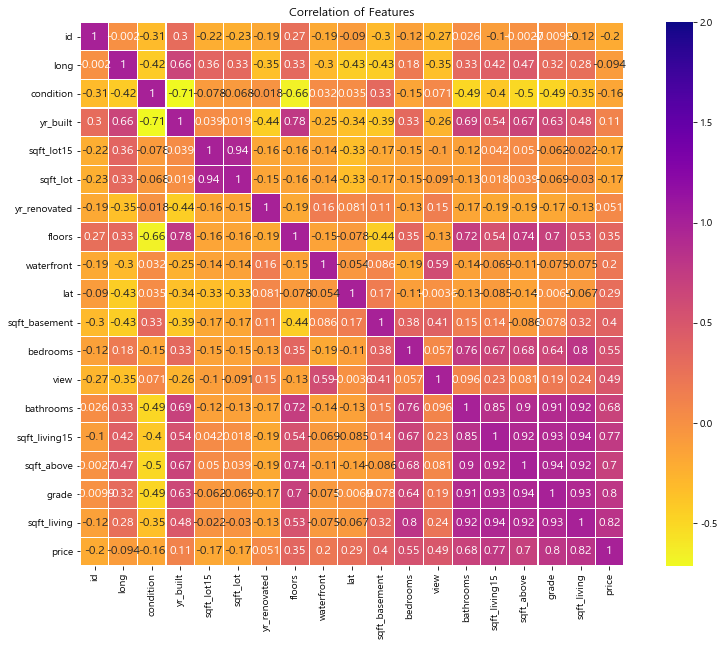

In [24]:
colormap = plt.cm.plasma_r
plt.figure(figsize = (15, 10))
plt.title('Correlation of Features')
sns.heatmap(heat_df.corr().astype(float), linewidths=0.1, vmax=2.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 12})
plt.show()

- 다중공선성이 존재하는 변수들을 대략적으로 파악

In [25]:
df.drop('id', axis=1,inplace=True)

In [26]:
pd.DataFrame(df.groupby('yr_built')['yr_renovated'].value_counts().sort_values())

yr_renovated
yr_built yr_renovated              
1939     1964                     1
1980     2001                     1
1947     2013                     1
         2011                     1
         2007                     1
...                             ...
2003     0                      283
2005     0                      302
2004     0                      305
2006     0                      325
2014     0                      405

[658 rows x 1 columns]

- yr_built와 yr_renovated를 이용하여 새로운 변수를 추가하기 위해 groupby시도

In [27]:
df.yr_renovated.value_counts()

0       14404
2014       71
2013       28
2003       25
2007       25
        ...  
1946        1
1954        1
1976        1
1944        1
1940        1
Name: yr_renovated, Length: 65, dtype: int64

In [28]:
def diff(x):
    if x == 0:
        return 0
    else:
        return 2021-x

df['After_renovated'] = df['yr_renovated'].apply(lambda x: diff(x));df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,After_renovated
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,2014,10,2014,0
1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,2015,02,2015,0
2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,2015,02,2015,0
3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,...,0,98003,47.3097,-122.327,2238,6819,2014,06,2014,0
4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,...,0,98198,47.4095,-122.315,1650,9711,2015,01,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,3,...,0,98056,47.5137,-122.167,2520,6023,2014,10,2014,0
15031,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,3,...,0,98136,47.5537,-122.398,2050,6200,2015,03,2015,0
15032,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,98103,47.6993,-122.346,1530,1509,2014,05,2014,0
15033,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,0,98146,47.5107,-122.362,1830,7200,2015,02,2015,0


- 수리된지 얼마의 시간이 지났는지의 변수추가

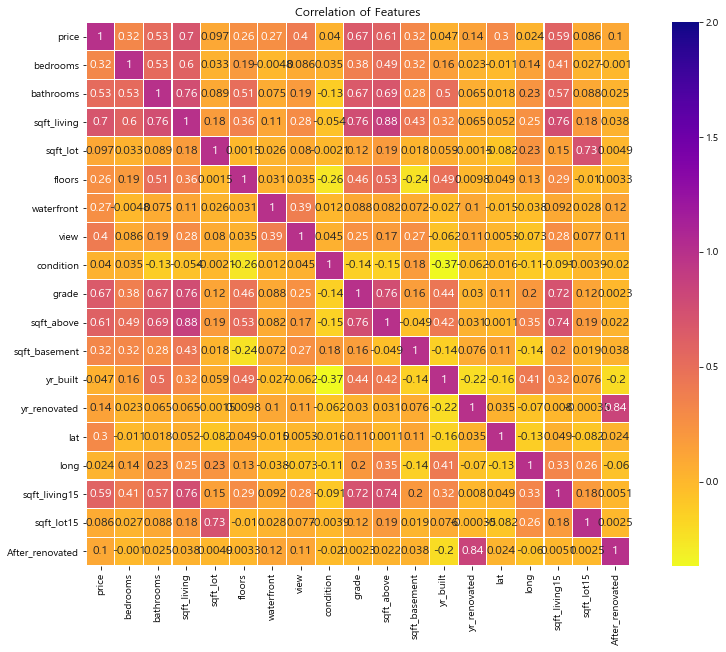

In [29]:
plt.figure(figsize = (15, 10))
plt.title('Correlation of Features')
sns.heatmap(df.corr().astype(float), linewidths=0.1, vmax=2.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 12})
plt.show()

- 맨 왼쪽 아래를 보면 새 변수와 Price의 상관관계가 매우 낮은 것을 볼 수 있다.
- 0의 개수가 너무나도 많았기에 좋은 결과를 도출하지 못한 것으로 예상

In [30]:
df.drop('After_renovated',axis=1, inplace=True)

- 새 변수 삭제

array([[<AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'sqft_above'}>, <AxesSubplot:>]],
      dtype=object)

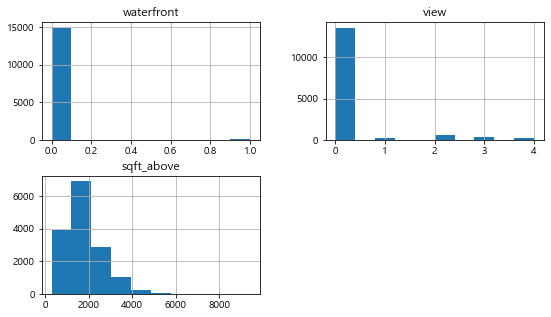

In [31]:
view_condition = df[['waterfront','view','sqft_above']]
view_condition.hist(figsize=(9,5))

- 각 분포가 왜도를 띄고있고 세 변수 모두 view와 관련된 조건으로 이것들을 이용하여 새로운 변수도출 생각
- 이를 위해 표준화실시
- 음수가 존재하지 않기 때문에 0~1로 변환하는 MinMaxScaler사용

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
view_condition_scaled = scaler.fit_transform(view_condition)

view_condition_scaled = pd.DataFrame(data=view_condition_scaled, columns=['waterfront','view','sqft_above'])
view_condition_scaled

,waterfront,view,sqft_above
0,0.0,0.0,0.097588
1,0.0,0.0,0.052632
2,0.0,0.0,0.152412
3,0.0,0.0,0.156250
4,0.0,0.0,0.084430
...,...,...,...
15030,0.0,0.0,0.244518
15031,0.0,0.0,0.253289
15032,0.0,0.0,0.135965
15033,0.0,0.0,0.221491


array([[<AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'sqft_above'}>, <AxesSubplot:>]],
      dtype=object)

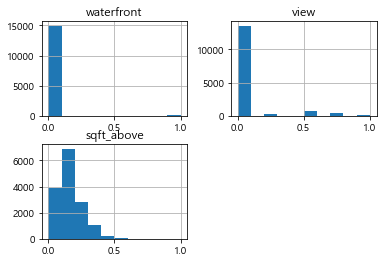

In [33]:
view_condition_scaled.hist()

In [34]:
df['view_condition'] = view_condition_scaled['waterfront']+ view_condition_scaled['view'] + view_condition_scaled['sqft_above']
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,view_condition
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,2014,10,2014,0.097588
1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,2015,02,2015,0.052632
2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,2015,02,2015,0.152412
3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,...,0,98003,47.3097,-122.327,2238,6819,2014,06,2014,0.156250
4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,...,0,98198,47.4095,-122.315,1650,9711,2015,01,2015,0.084430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,3,...,0,98056,47.5137,-122.167,2520,6023,2014,10,2014,0.244518
15031,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,3,...,0,98136,47.5537,-122.398,2050,6200,2015,03,2015,0.253289
15032,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,98103,47.6993,-122.346,1530,1509,2014,05,2014,0.135965
15033,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,0,98146,47.5107,-122.362,1830,7200,2015,02,2015,0.221491


- 세개의 변수를 합쳐 새 변수 생성

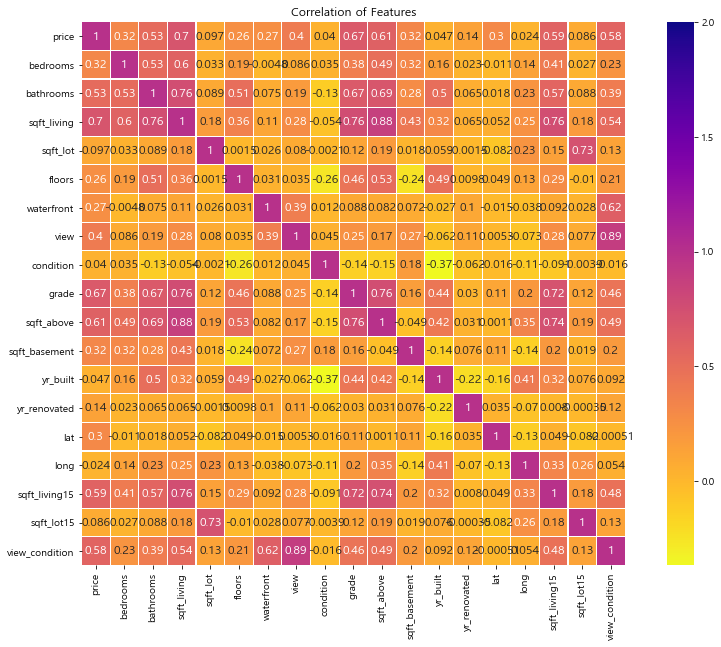

In [35]:
plt.figure(figsize = (15, 10))
plt.title('Correlation of Features')
sns.heatmap(df.corr().astype(float), linewidths=0.1, vmax=2.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 12})
plt.show()

- 맨 밑쪽을 보면 Price와의 상관관계가 0.58인 것을 알 수 있다.

C:\Users\lms75\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lms75\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


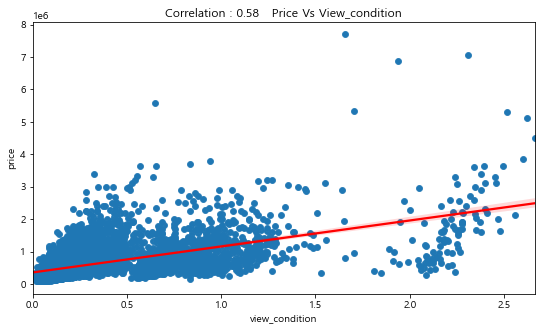

In [36]:
plt.figure(figsize=(9,5))
sns.scatterplot(df['view_condition'], df['price'])
sns.regplot(df['view_condition'], df['price'], line_kws={'color':'r'})
plt.title('Correlation : 0.58   Price Vs View_condition')
plt.show()